# Top

In [1]:
# Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom
#import finance_utils as fu
#import ystockquote as ysq
#import technical_indicators as ti
import stock_db_mgr as sdm

In [2]:
# Adjust figure size to be bigger:
plt.rcParams['figure.figsize'] = [15, 6]

# Set seaborn plot theme:
sns.set_theme()

# Lesson 7

In [3]:
db = sdm.StockDBMgr('stock_db/test', '2010-01-01')

In [4]:
df = db.get_all_symbol_single_data_item('Close')

In [5]:
df.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,6.526021,109.800003,15.610239,82.284225,88.860367,42.336414
2010-01-05,6.537304,109.699997,15.541497,81.290230,89.095604,42.501717
2010-01-06,6.433319,111.510002,15.149715,80.762177,89.158325,42.869049
2010-01-07,6.421425,110.820000,14.797037,80.482628,89.534714,42.734364
2010-01-08,6.464116,111.370003,14.994298,81.290230,89.832657,42.562935


In [6]:
# Get daily returns (pc = percent)
pc = df.pct_change()
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003905
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004222,-0.003142
2010-01-08,0.006648,0.004963,0.013331,0.010034,0.003328,-0.004012


In [7]:
# To not have na for first value.
pc.iloc[0] = 0.0

In [8]:
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003905
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004222,-0.003142
2010-01-08,0.006648,0.004963,0.013331,0.010034,0.003328,-0.004012


## Histogram

<AxesSubplot:>

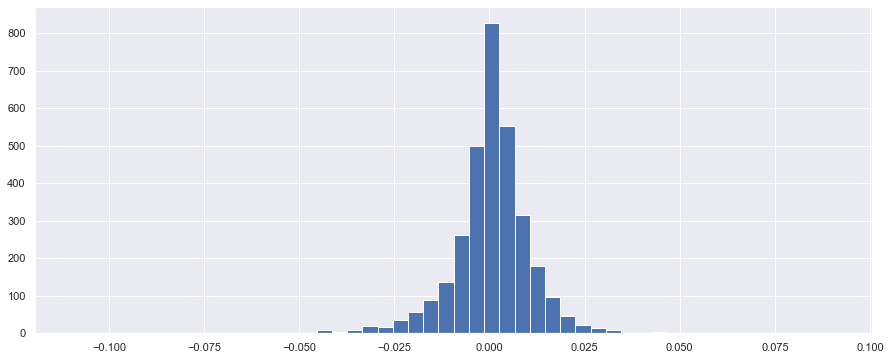

In [9]:
# Basic histogram
pc['SPY'].hist(bins=50)

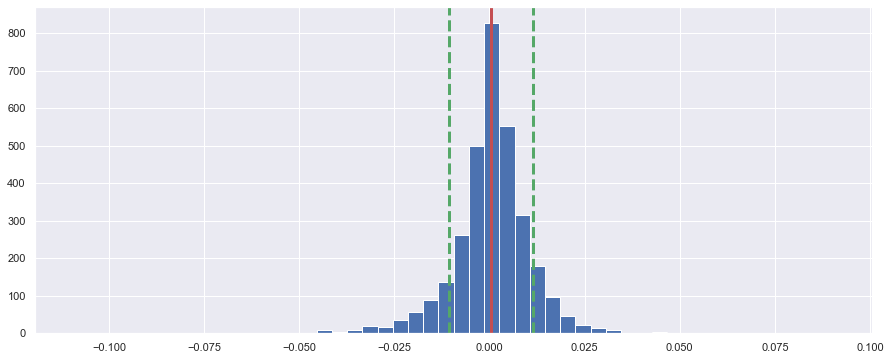

In [10]:
# With std & mean
# TBD bug in lesson: missing std +/- mean.
pc['SPY'].hist(bins=50)
plt.axvline(pc['SPY'].mean(), color='r', linewidth=3)
plt.axvline(pc['SPY'].mean() - pc['SPY'].std(), color='g', linewidth=3, linestyle='dashed')
plt.axvline(pc['SPY'].mean() + pc['SPY'].std(), color='g', linewidth=3, linestyle='dashed')

Statistics moment:
1. mean
2. std dev
3. skewness: negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right
4. kurtosis

In [11]:
df.pct_change().describe()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
count,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000,3218.000000
mean,0.001111,0.000152,0.000709,0.000218,0.000494,0.000392
std,0.017936,0.009870,0.016808,0.014178,0.011022,0.015963
min,-0.128647,-0.087808,-0.111008,-0.128507,-0.109424,-0.122248
25%,-0.007435,-0.004877,-0.006802,-0.006254,-0.003705,-0.006951
50%,0.000923,0.000421,0.000674,0.000397,0.000664,0.000117
75%,0.010644,0.005363,0.008857,0.007005,0.005634,0.007773
max,0.119808,0.049038,0.160524,0.113011,0.090603,0.126868


In [12]:
df.pct_change().skew()

Close
AAPL   -0.108051
GLD    -0.461223
GOOG    0.513659
IBM    -0.503472
SPY    -0.575272
XOM     0.062215
dtype: float64

In [13]:
df.pct_change().kurtosis()

Close
AAPL     5.180968
GLD      4.795717
GOOG     9.260209
IBM      9.678616
SPY     11.139848
XOM      7.837558
dtype: float64

## Scatterplots

In [14]:
pc.head()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Date,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.001729,-0.000911,-0.004404,-0.012080,0.002647,0.003905
2010-01-06,-0.015906,0.016500,-0.025209,-0.006496,0.000704,0.008643
2010-01-07,-0.001849,-0.006188,-0.023280,-0.003461,0.004222,-0.003142
2010-01-08,0.006648,0.004963,0.013331,0.010034,0.003328,-0.004012


Notes:
* Slope is Beta
* Offset is Alpha
* Slope is NOT correlation
* Correlation is how tight the points are to the line fitting

<AxesSubplot:xlabel='SPY', ylabel='IBM'>

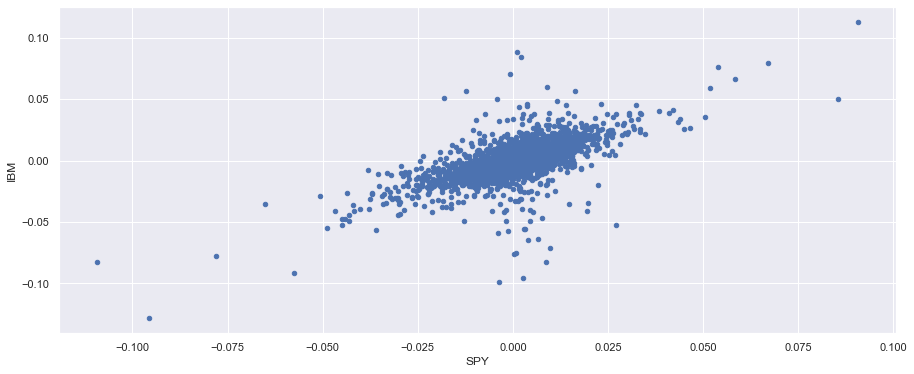

In [15]:
# Strangely, without color argument, we get a warning
pc.plot(x='SPY', y='IBM', kind='scatter', color='b')

<AxesSubplot:xlabel='SPY', ylabel='GLD'>

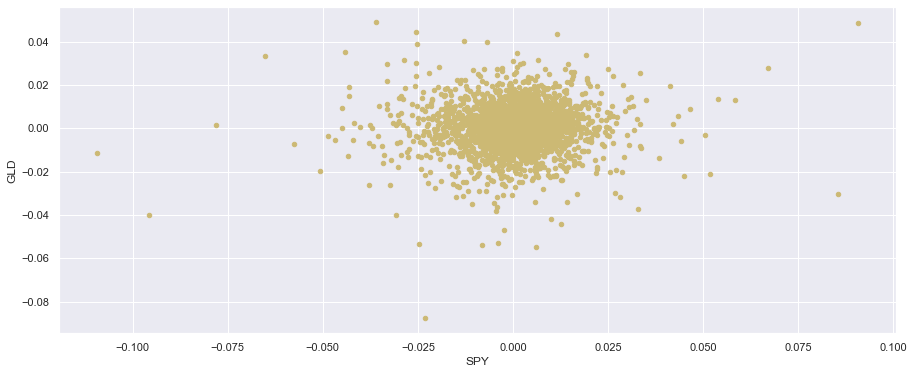

In [16]:
pc.plot(x='SPY', y='GLD', kind='scatter', color='y')

### Regression line

In [17]:
beta, alpha = np.polyfit(pc['SPY'], pc['IBM'], 1)

In [18]:
(beta, alpha)

(0.8478543096394201, -0.0002001865856536753)

In [19]:
pc['SPY'].min(), pc['SPY'].max()

(-0.10942352208432848, 0.09060330568080177)

In [20]:
x = np.linspace(pc['SPY'].min(), pc['SPY'].max(), 10)

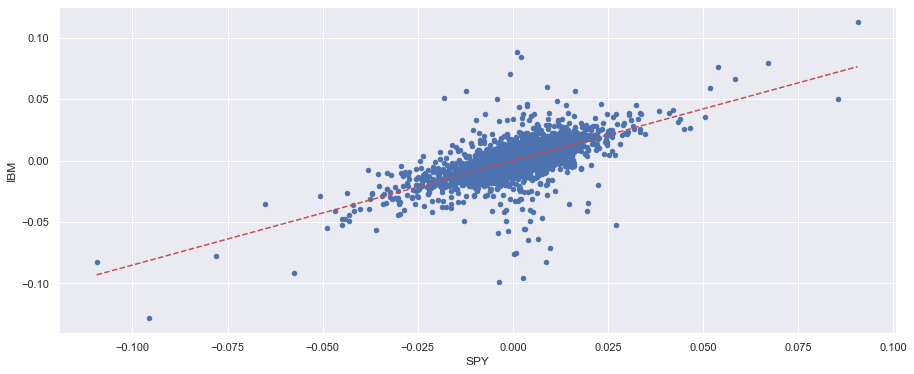

In [21]:
pc.plot(x='SPY', y='IBM', kind='scatter', color='b')
plt.plot(x, x * beta + alpha, linestyle='--', color='r')

In [22]:
def plot_correlation(df, s1, s2):
    beta, alpha = np.polyfit(df[s1], df[s2], 1)
    x = np.linspace(df[s1].min(), df[s1].max(), 20)
    df.plot(x=s1, y=s2, kind='scatter', color='g')
    plt.plot(x, x * beta + alpha, linestyle='--', color='r')
    return (beta, alpha)    

(0.9265005378531035, -6.547938766585156e-05)

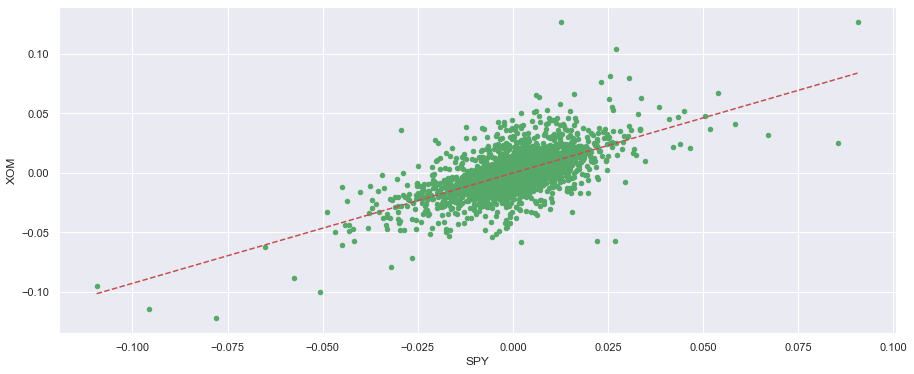

In [23]:
plot_correlation(pc, 'SPY', 'XOM')

(0.031055706061212794, 0.0001365378702081974)

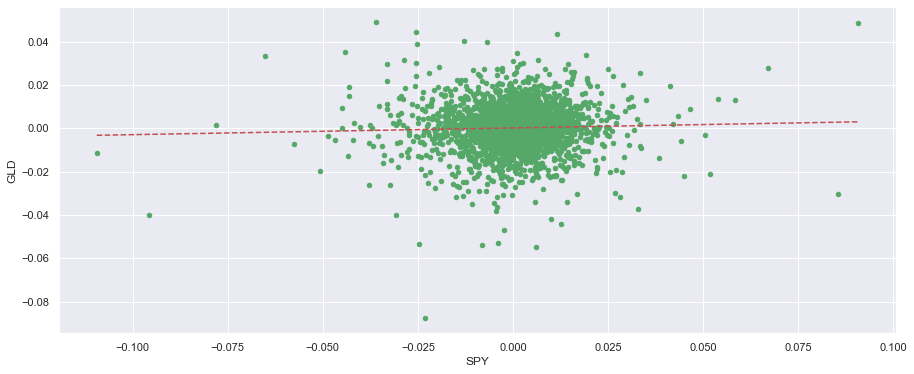

In [24]:
plot_correlation(pc, 'SPY', 'GLD')

## Correlation

In [25]:
pc.corr()

Close,AAPL,GLD,GOOG,IBM,SPY,XOM
Close,,,,,,
AAPL,1.000000,0.047047,0.554145,0.409764,0.682896,0.330879
GLD,0.047047,1.000000,0.008926,0.018433,0.034682,0.058403
GOOG,0.554145,0.008926,1.000000,0.424006,0.702384,0.371763
IBM,0.409764,0.018433,0.424006,1.000000,0.659139,0.510014
SPY,0.682896,0.034682,0.702384,0.659139,1.000000,0.639751
XOM,0.330879,0.058403,0.371763,0.510014,0.639751,1.000000


In [26]:
pc.corr().min()

Close
AAPL    0.047047
GLD     0.008926
GOOG    0.008926
IBM     0.018433
SPY     0.034682
XOM     0.058403
dtype: float64

In [27]:
pc.corr().idxmin()

Close
AAPL     GLD
GLD     GOOG
GOOG     GLD
IBM      GLD
SPY      GLD
XOM      GLD
dtype: object

### Test with bigger DB

In [28]:
db = sdm.StockDBMgr('stock_db/tsx', '2020-01-01')
df = db.get_all_symbol_single_data_item('Close')

In [29]:
pc = df[df.notna().all(1)].pct_change().dropna(0, 'all')

In [30]:
pc.corr().idxmin()

Close
ABX.TO        MG.TO
AC.TO          L.TO
ACB.TO       EMA.TO
ACO-X.TO    TLRY.TO
AEM.TO       LNR.TO
             ...   
WSP.TO       TRQ.TO
WTE.TO       TOY.TO
X.TO         TRQ.TO
YRI.TO       TRI.TO
ZZZ.TO         H.TO
Length: 227, dtype: object

(0.5250561507399429, -0.0026897096289667513)

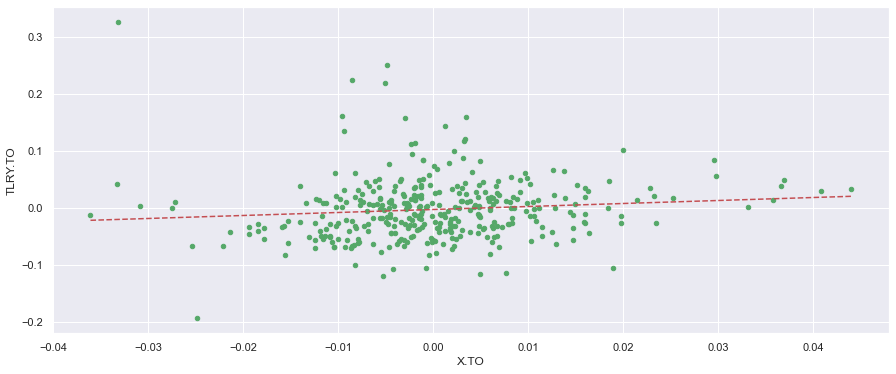

In [31]:
plot_correlation(pc, 'X.TO', 'TLRY.TO')